**2. Sonar**
---
<http://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29>

**other resources for the same data set** <br>
<http://people.duke.edu/~ccc14/sta-663-2016/05_Machine_Learning.html> <br>
<https://sci2s.ugr.es/keel/dataset.php?cod=85>


In [2]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [3]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [4]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [5]:
# Reading the dataset and creating the dataframe
sonar = loadmat('Datasets.mat/Sonar_208x60_binary.mat')

df = pd.DataFrame(sonar.get('X'))
df['y'] = sonar.get('y').ravel()

In [6]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

In [7]:
len(df)+len(df_test)

208

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
15,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073,1
58,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,...,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027,1
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068,1
90,0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,...,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077,1
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 15 to 92
Data columns (total 61 columns):
0     166 non-null float64
1     166 non-null float64
2     166 non-null float64
3     166 non-null float64
4     166 non-null float64
5     166 non-null float64
6     166 non-null float64
7     166 non-null float64
8     166 non-null float64
9     166 non-null float64
10    166 non-null float64
11    166 non-null float64
12    166 non-null float64
13    166 non-null float64
14    166 non-null float64
15    166 non-null float64
16    166 non-null float64
17    166 non-null float64
18    166 non-null float64
19    166 non-null float64
20    166 non-null float64
21    166 non-null float64
22    166 non-null float64
23    166 non-null float64
24    166 non-null float64
25    166 non-null float64
26    166 non-null float64
27    166 non-null float64
28    166 non-null float64
29    166 non-null float64
30    166 non-null float64
31    166 non-null float64
32    166 non-null float64
33  

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.027794,0.035560,0.040646,0.050643,0.072078,0.104285,0.120720,0.131930,0.172197,0.199594,...,0.012919,0.010364,0.010940,0.008814,0.007920,0.007561,0.007682,0.007833,0.006308,1.536145
std,0.021460,0.027424,0.031700,0.038186,0.050824,0.060123,0.062244,0.084917,0.114869,0.125180,...,0.009512,0.006454,0.007407,0.006640,0.005178,0.005132,0.006081,0.005956,0.005128,0.500201
min,0.001500,0.000600,0.001500,0.005800,0.007600,0.011600,0.003300,0.005700,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000200,0.000600,1.000000
25%,0.013100,0.015550,0.018025,0.024325,0.037350,0.066875,0.080300,0.078625,0.093350,0.110925,...,0.007200,0.005250,0.005300,0.003900,0.004250,0.003700,0.003500,0.003925,0.003000,1.000000
50%,0.022650,0.029250,0.032050,0.040850,0.061200,0.088050,0.105600,0.111800,0.152250,0.180450,...,0.010700,0.009450,0.009300,0.007300,0.006800,0.005950,0.005750,0.006400,0.005250,2.000000
75%,0.033900,0.047350,0.056650,0.061550,0.096250,0.142425,0.148775,0.165925,0.229925,0.259050,...,0.016275,0.014300,0.014350,0.011625,0.010100,0.010450,0.010175,0.009775,0.007900,2.000000
max,0.137100,0.127800,0.199700,0.260400,0.322500,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.031700,0.035200,0.037600,0.032600,0.025800,0.037700,0.036400,0.043900,2.000000


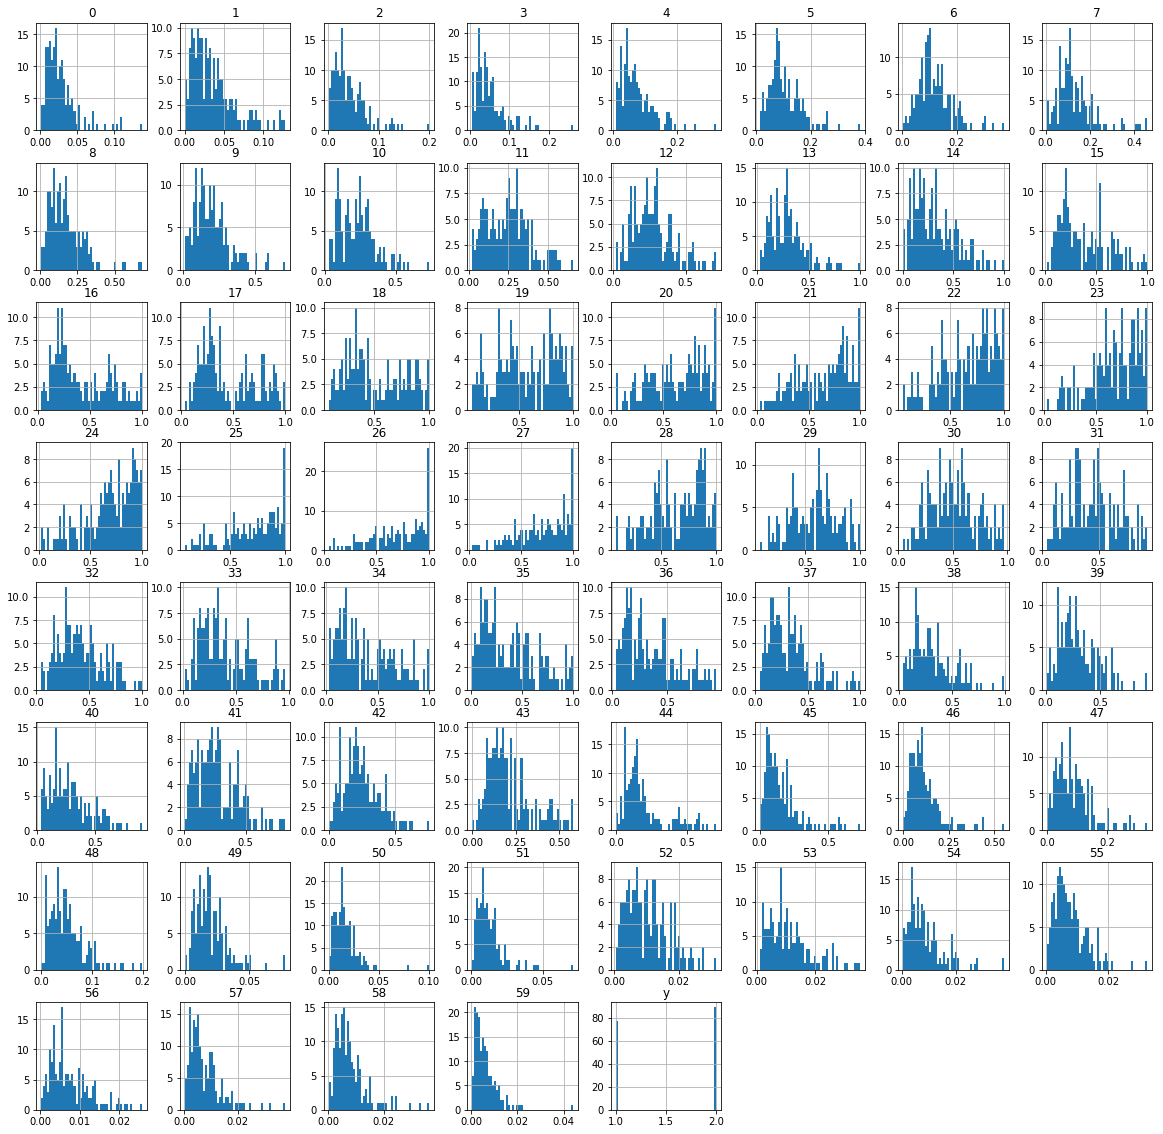

In [11]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

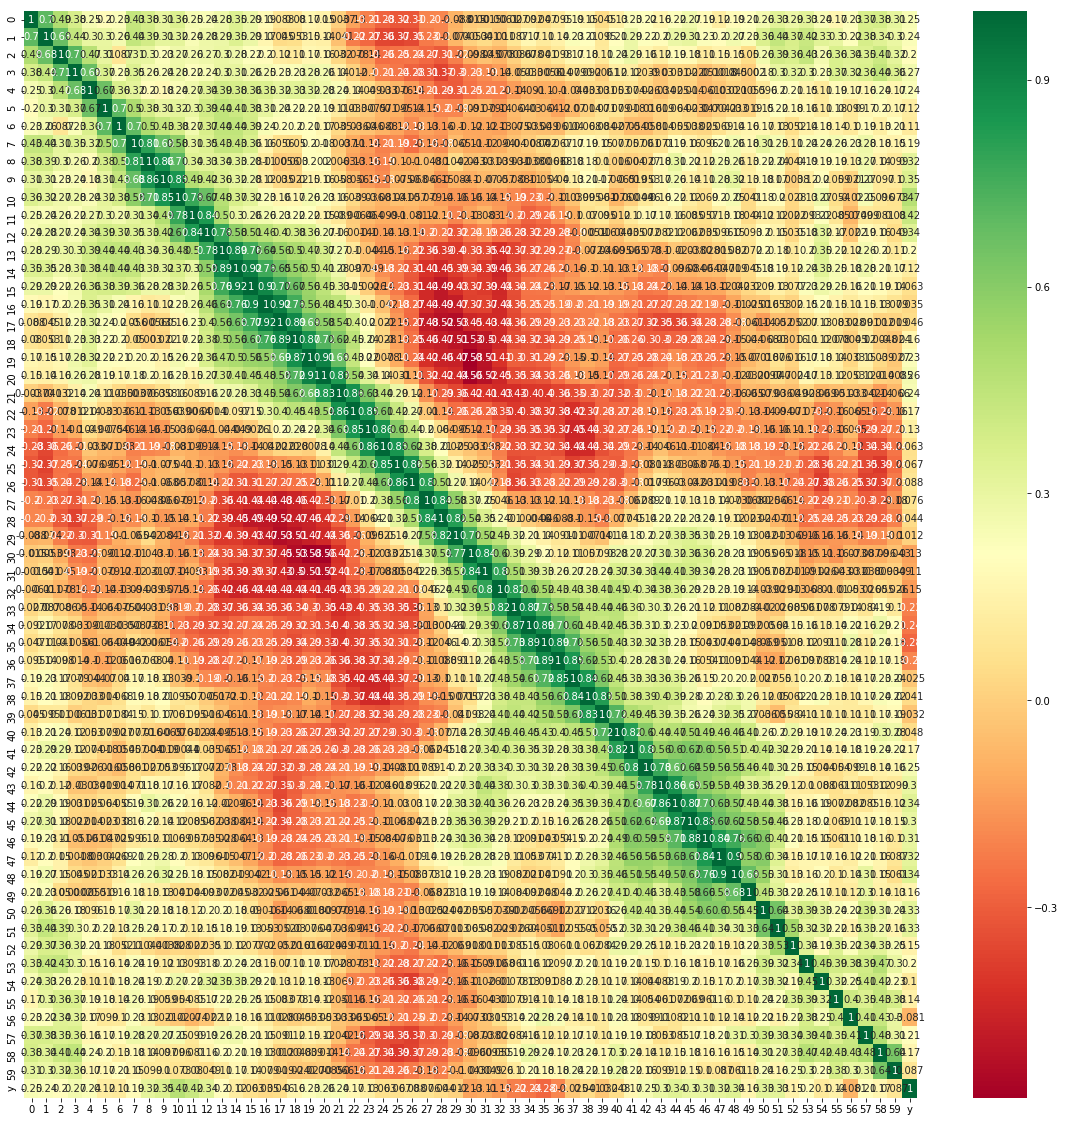

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [13]:
corrmat['y'].sort_values(ascending=True)

35   -0.276652
34   -0.241619
33   -0.218189
36   -0.197166
32   -0.148322
30   -0.130990
31   -0.108218
56   -0.080663
39   -0.032469
37   -0.025126
29    0.011761
16    0.034825
38    0.041228
28    0.044161
17    0.046423
40    0.048133
15    0.062803
24    0.062839
25    0.067093
27    0.076345
59    0.086826
26    0.087516
54    0.102672
6     0.113190
14    0.122575
5     0.124833
23    0.127067
55    0.141184
52    0.148900
49    0.157393
        ...   
58    0.165606
22    0.169293
41    0.174791
7     0.188803
53    0.200149
2     0.201268
13    0.201677
57    0.205427
19    0.228505
1     0.235551
4     0.236274
21    0.242912
0     0.245788
42    0.250847
20    0.257970
3     0.266794
45    0.299376
43    0.302531
46    0.309729
8     0.319062
47    0.321003
51    0.325045
50    0.325896
12    0.335981
44    0.337228
48    0.342822
9     0.353901
11    0.417965
10    0.471639
y     1.000000
Name: y, Length: 61, dtype: float64

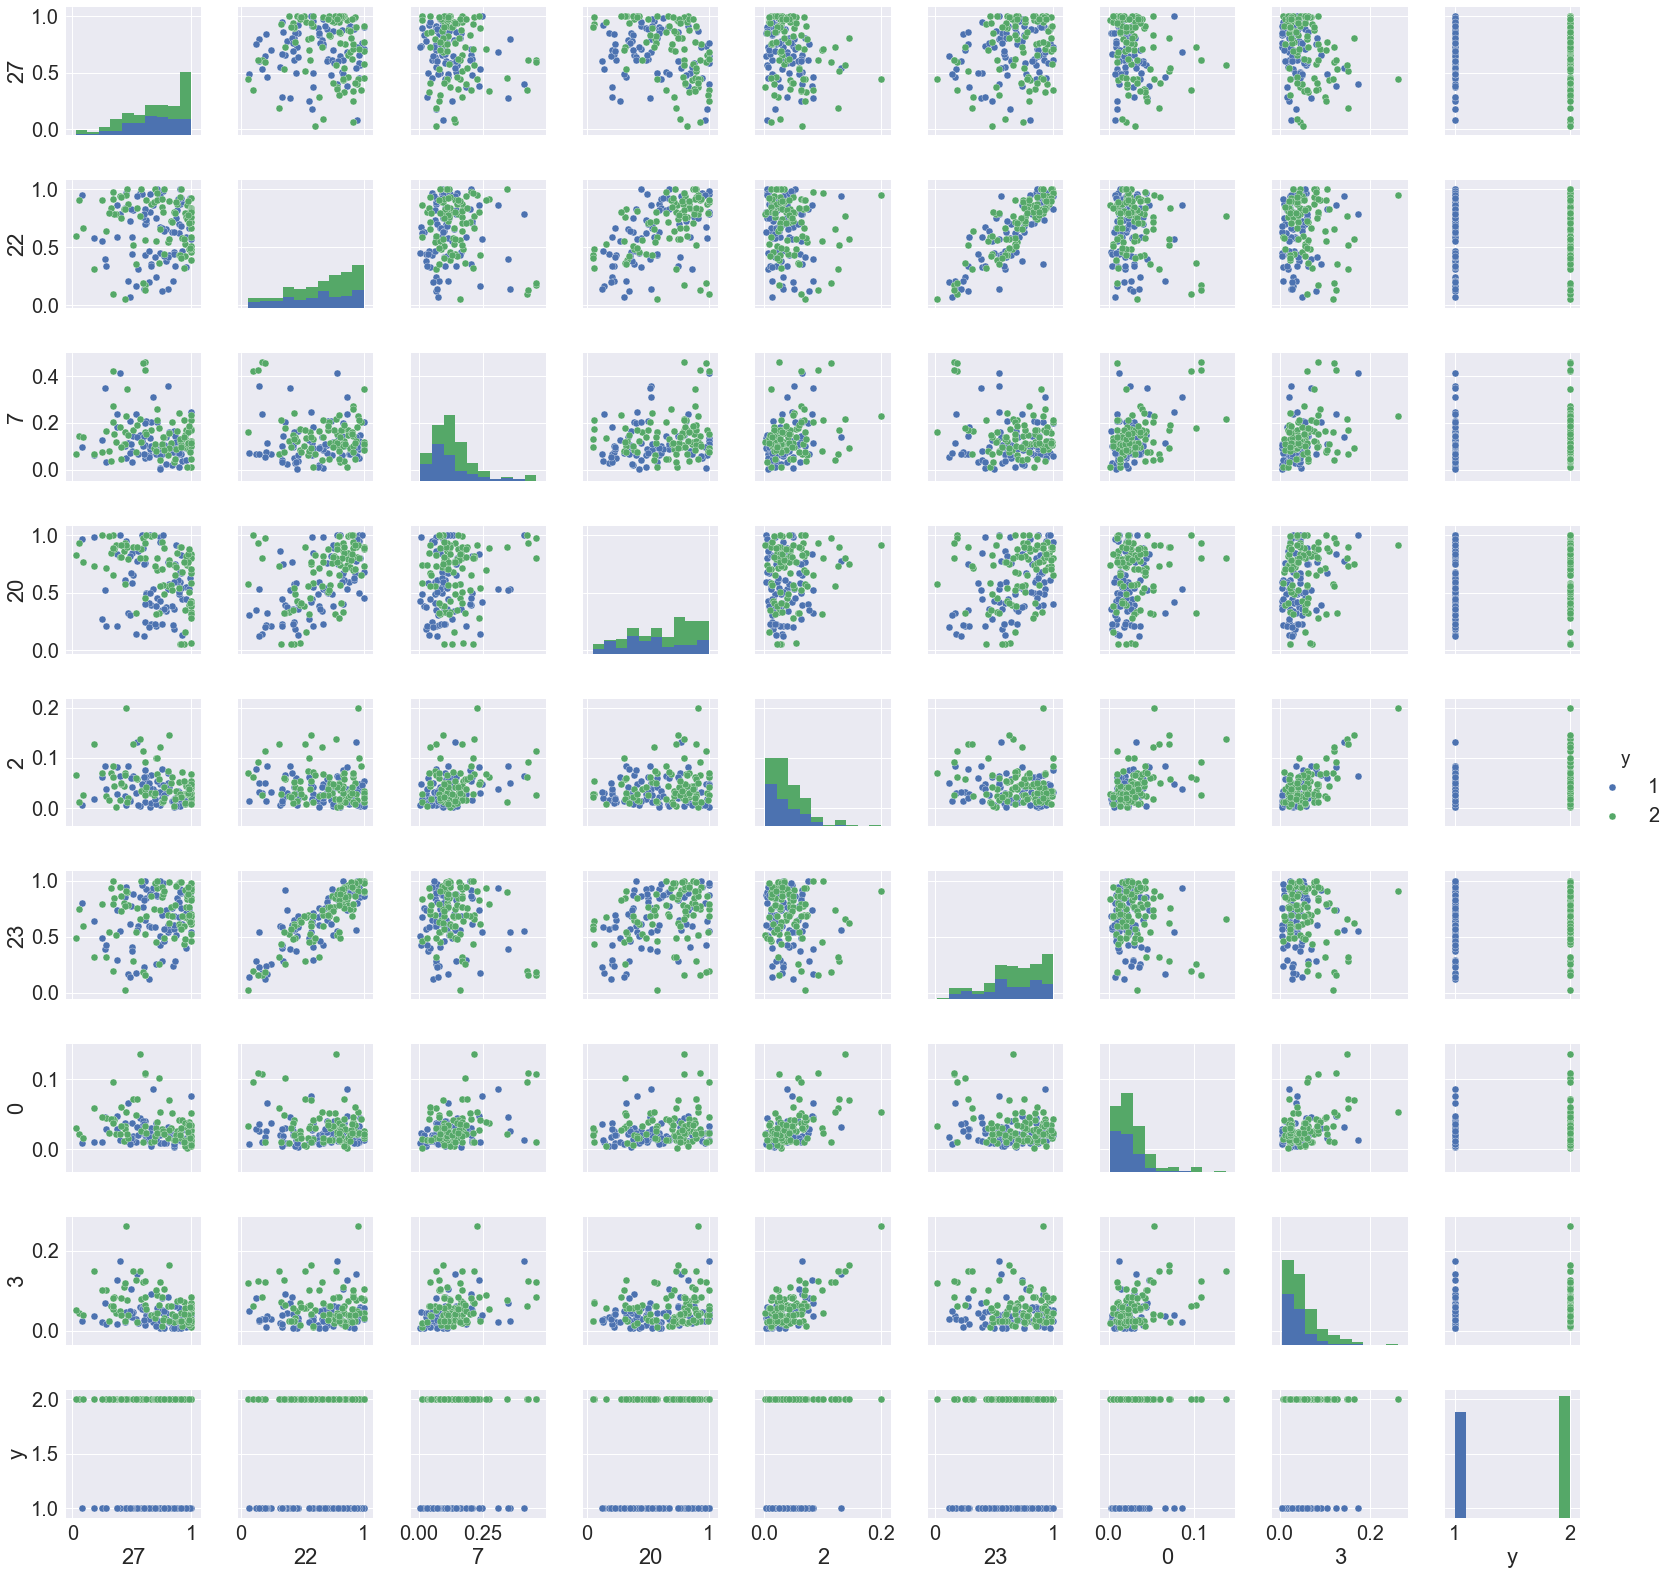

In [14]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[27,22, 7,20,2,23,0,3,'y']], hue='y')

In [15]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.536145
1    0.463855
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [16]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [17]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.705 (+/- 0.118)
The IQR is 0.108 between [0.62,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.65      0.79      0.71       770
         2.0       0.78      0.63      0.70       890

    accuracy                           0.70      1660
   macro avg       0.71      0.71      0.70      1660
weighted avg       0.72      0.70      0.70      1660

The average training time is 0.002553 seconds


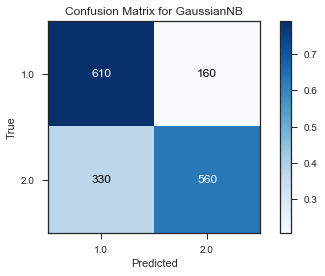

<Figure size 576x576 with 0 Axes>

In [18]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.62
              precision    recall  f1-score   support

           1       0.55      0.61      0.58        18
           2       0.68      0.62      0.65        24

    accuracy                           0.62        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.63      0.62      0.62        42



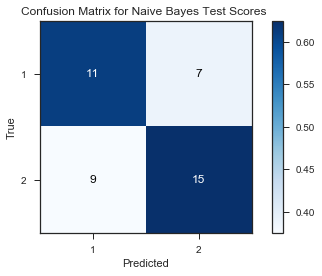

<Figure size 576x576 with 0 Axes>

In [19]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])


# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.759 (+/- 0.082)
The IQR is 0.074 between [0.75,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.78      0.66      0.72       770
         2.0       0.74      0.84      0.79       890

    accuracy                           0.76      1660
   macro avg       0.76      0.75      0.75      1660
weighted avg       0.76      0.76      0.76      1660

The average training time is 0.003363 seconds


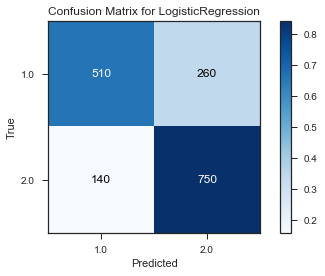

<Figure size 576x576 with 0 Axes>

In [20]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [21]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.81
              precision    recall  f1-score   support

           1       0.75      0.83      0.79        18
           2       0.86      0.79      0.83        24

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



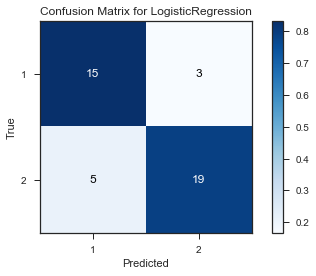

<Figure size 576x576 with 0 Axes>

In [22]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.827 (+/- 0.095)
The IQR is 0.118 between [0.76,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.85      0.75      0.80       770
         2.0       0.80      0.89      0.84       890

    accuracy                           0.82      1660
   macro avg       0.83      0.82      0.82      1660
weighted avg       0.83      0.82      0.82      1660

The average training time is 0.900625 seconds


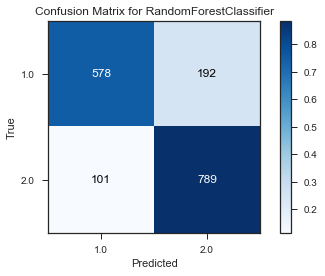

<Figure size 576x576 with 0 Axes>

In [23]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500, n_jobs = -1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.81
              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.95      0.75      0.84        28

    accuracy                           0.81        42
   macro avg       0.80      0.84      0.80        42
weighted avg       0.85      0.81      0.81        42



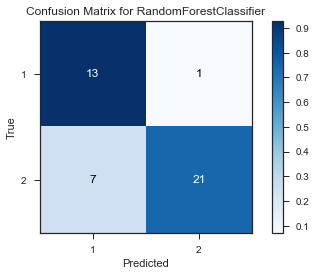

<Figure size 576x576 with 0 Axes>

In [24]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.797 (+/- 0.108)
The IQR is 0.232 between [0.71,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.81      0.73      0.77       770
         2.0       0.78      0.85      0.82       890

    accuracy                           0.80      1660
   macro avg       0.80      0.79      0.79      1660
weighted avg       0.80      0.80      0.79      1660

The average training time is 0.529447 seconds


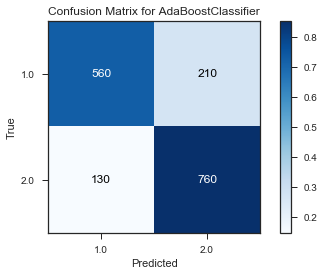

<Figure size 576x576 with 0 Axes>

In [25]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.81
              precision    recall  f1-score   support

           1       0.75      0.83      0.79        18
           2       0.86      0.79      0.83        24

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



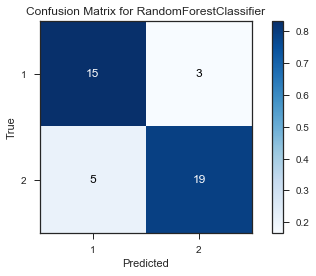

<Figure size 576x576 with 0 Axes>

In [26]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [27]:
np.shape(df['y'])

(166,)

The model score is 0.886 (+/- 0.076)
The IQR is 0.062 between [0.88,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.90      0.84      0.87       770
         2.0       0.87      0.92      0.90       890

    accuracy                           0.89      1660
   macro avg       0.89      0.88      0.88      1660
weighted avg       0.89      0.89      0.89      1660

The model score is 0.874 (+/- 0.096)
The IQR is 0.118 between [0.82,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.83      0.92      0.87       770
         2.0       0.93      0.83      0.88       890

    accuracy                           0.87      1660
   macro avg       0.88      0.88      0.87      1660
weighted avg       0.88      0.87      0.87      1660

The model score is 0.815 (+/- 0.070)
The IQR is 0.102 between [0.76,0.87]
There is 0 deleted rows
              precision    recall  f1-score   suppor

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.676 (+/- 0.085)
The IQR is 0.118 between [0.59,0.71]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.70      0.52      0.60       770
         2.0       0.66      0.81      0.73       890

    accuracy                           0.67      1660
   macro avg       0.68      0.66      0.66      1660
weighted avg       0.68      0.67      0.67      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.676 (+/- 0.103)
The IQR is 0.145 between [0.59,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.66      0.61      0.64       770
         2.0       0.68      0.73      0.71       890

    accuracy                           0.67      1660
   macro avg       0.67      0.67      0.67      1660
weighted avg       0.67      0.67      0.67      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.683 (+/- 0.087)
The IQR is 0.145 between [0.59,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.70      0.55      0.61       770
         2.0       0.67      0.80      0.73       890

    accuracy                           0.68      1660
   macro avg       0.68      0.67      0.67      1660
weighted avg       0.68      0.68      0.67      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.695 (+/- 0.092)
The IQR is 0.176 between [0.59,0.76]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.70      0.58      0.64       770
         2.0       0.69      0.79      0.73       890

    accuracy                           0.69      1660
   macro avg       0.69      0.69      0.69      1660
weighted avg       0.69      0.69      0.69      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.690 (+/- 0.096)
The IQR is 0.176 between [0.59,0.76]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.72      0.53      0.61       770
         2.0       0.67      0.82      0.74       890

    accuracy                           0.69      1660
   macro avg       0.69      0.68      0.67      1660
weighted avg       0.69      0.69      0.68      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.683 (+/- 0.077)
The IQR is 0.162 between [0.59,0.75]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.69      0.56      0.62       770
         2.0       0.67      0.79      0.73       890

    accuracy                           0.68      1660
   macro avg       0.68      0.67      0.67      1660
weighted avg       0.68      0.68      0.68      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.689 (+/- 0.084)
The IQR is 0.176 between [0.59,0.76]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.73      0.52      0.61       770
         2.0       0.67      0.83      0.74       890

    accuracy                           0.69      1660
   macro avg       0.70      0.68      0.67      1660
weighted avg       0.69      0.69      0.68      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.724 (+/- 0.061)
The IQR is 0.118 between [0.65,0.76]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.75      0.61      0.67       770
         2.0       0.71      0.82      0.76       890

    accuracy                           0.72      1660
   macro avg       0.73      0.72      0.72      1660
weighted avg       0.73      0.72      0.72      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.689 (+/- 0.085)
The IQR is 0.162 between [0.59,0.75]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.72      0.53      0.61       770
         2.0       0.67      0.82      0.74       890

    accuracy                           0.69      1660
   macro avg       0.69      0.68      0.67      1660
weighted avg       0.69      0.69      0.68      1660



C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The model score is 0.694 (+/- 0.093)
The IQR is 0.103 between [0.65,0.75]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.70      0.60      0.64       770
         2.0       0.69      0.78      0.73       890

    accuracy                           0.69      1660
   macro avg       0.69      0.69      0.69      1660
weighted avg       0.69      0.69      0.69      1660



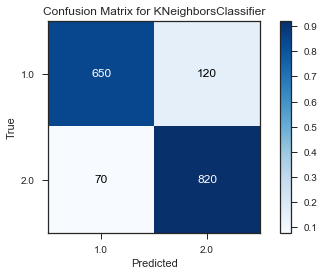

<Figure size 576x576 with 0 Axes>

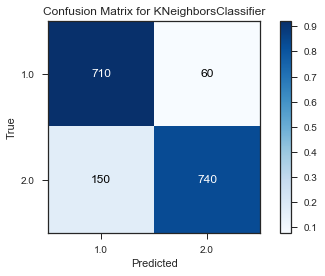

<Figure size 576x576 with 0 Axes>

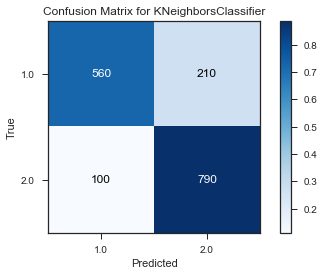

<Figure size 576x576 with 0 Axes>

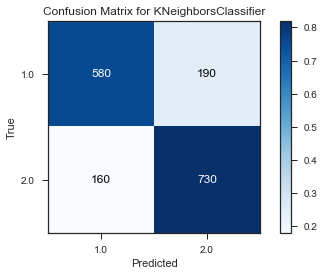

<Figure size 576x576 with 0 Axes>

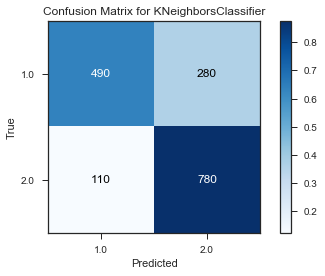

<Figure size 576x576 with 0 Axes>

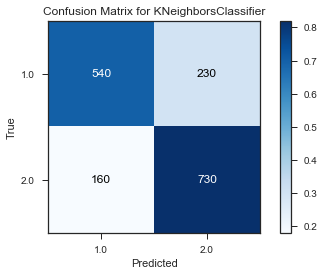

<Figure size 576x576 with 0 Axes>

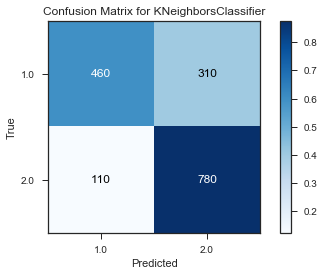

<Figure size 576x576 with 0 Axes>

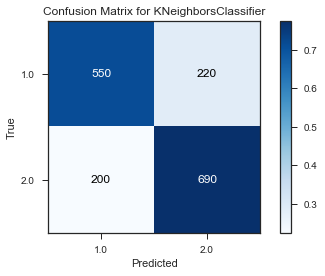

<Figure size 576x576 with 0 Axes>

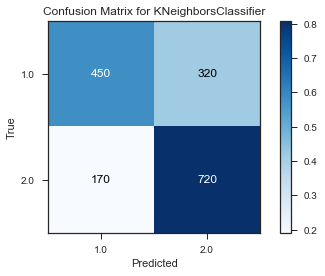

<Figure size 576x576 with 0 Axes>

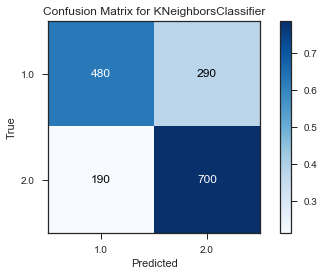

<Figure size 576x576 with 0 Axes>

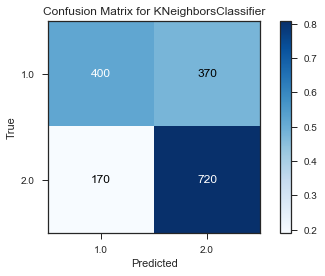

<Figure size 576x576 with 0 Axes>

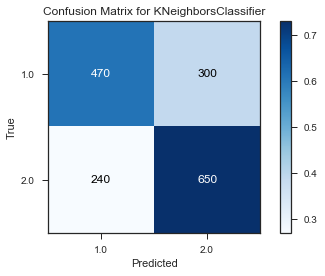

<Figure size 576x576 with 0 Axes>

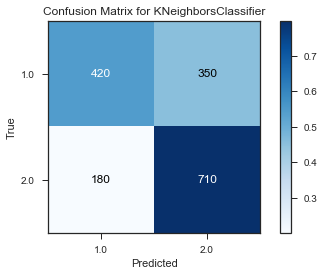

<Figure size 576x576 with 0 Axes>

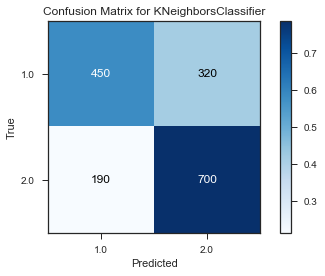

<Figure size 576x576 with 0 Axes>

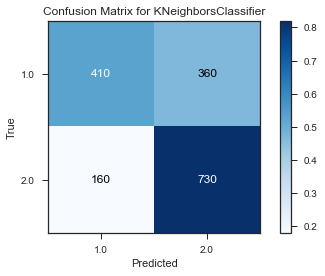

<Figure size 576x576 with 0 Axes>

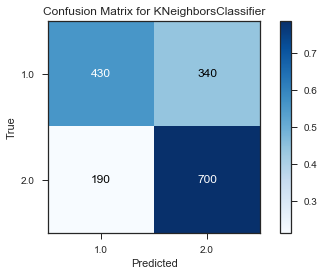

<Figure size 576x576 with 0 Axes>

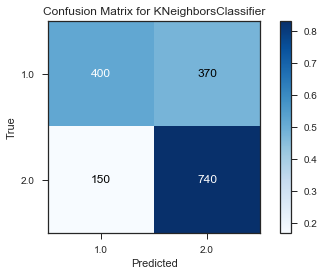

<Figure size 576x576 with 0 Axes>

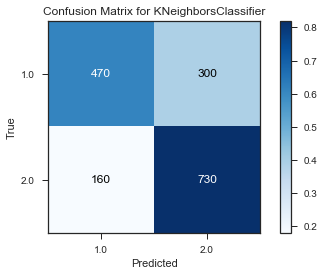

<Figure size 576x576 with 0 Axes>

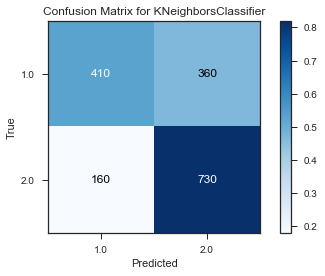

<Figure size 576x576 with 0 Axes>

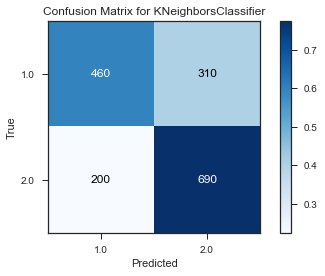

<Figure size 576x576 with 0 Axes>

In [28]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

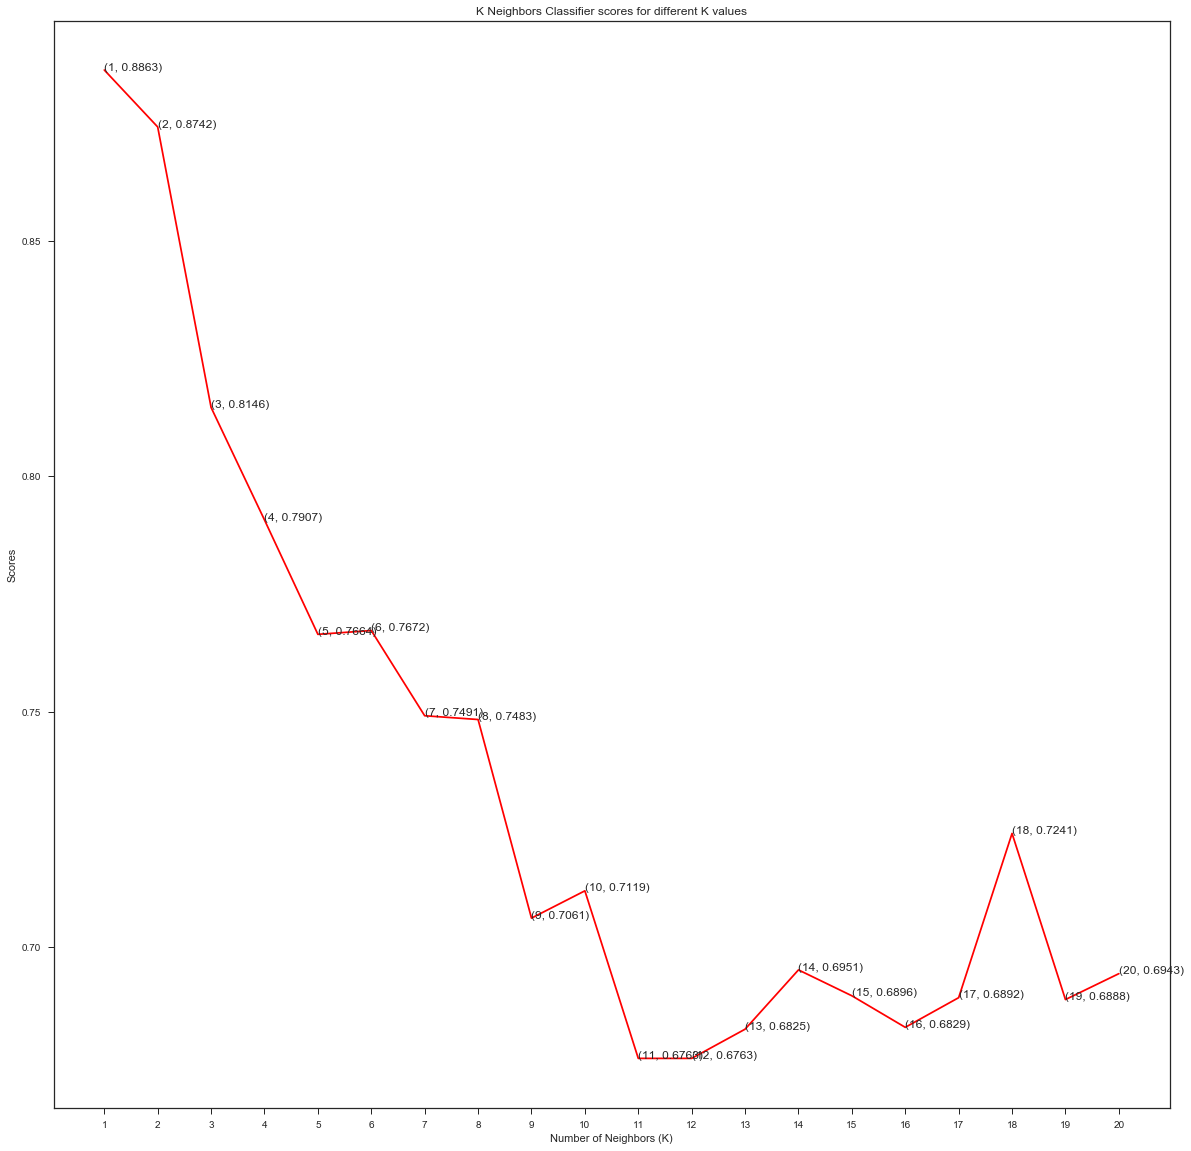

In [29]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.886 (+/- 0.076)
The IQR is 0.062 between [0.88,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.90      0.84      0.87       770
         2.0       0.87      0.92      0.90       890

    accuracy                           0.89      1660
   macro avg       0.89      0.88      0.88      1660
weighted avg       0.89      0.89      0.89      1660

The average training time is 0.002893 seconds


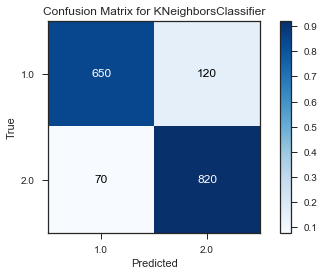

<Figure size 576x576 with 0 Axes>

In [30]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 0.8333
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.86      0.83      0.84        23

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



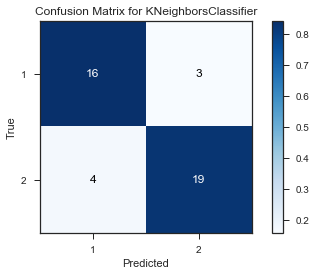

<Figure size 576x576 with 0 Axes>

In [31]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [32]:
from time import time

In [33]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 27.904082 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.807 (+/- 0.107)
The IQR is 0.169 between [0.71,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.80      0.78      0.79       770
         2.0       0.81      0.83      0.82       890

    accuracy                           0.81      1660
   macro avg       0.81      0.81      0.81      1660
weighted avg       0.81      0.81      0.81      1660

The average training time is 0.004008 seconds


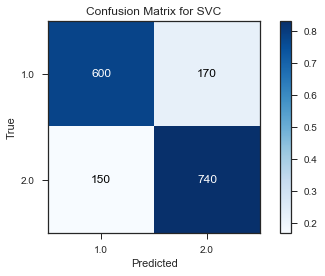

<Figure size 576x576 with 0 Axes>

In [34]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [35]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6987951807228916 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.6987951807228916 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.0001220703125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.000244140625}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.00048828125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.0009765625}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.001953125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.00390625}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.0078125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.015625}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.03125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.0625}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.125}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.25}
0.6987951807228916 {'C': 0.03125, 'gamma': 0.5}
0.6987951807228916 {'C': 0.03125, 'gamma': 1.0}
0.6987951807228916 {'C': 0.03125, 'gamma': 2.0}
0.6987951807228916 {'C': 0.03125, 'gamma': 4.0}
0.6987951807228916 {'C': 0.03125,

The test accuracy is 0.6429
              precision    recall  f1-score   support

           1       0.55      0.65      0.59        17
           2       0.73      0.64      0.68        25

    accuracy                           0.64        42
   macro avg       0.64      0.64      0.64        42
weighted avg       0.66      0.64      0.65        42



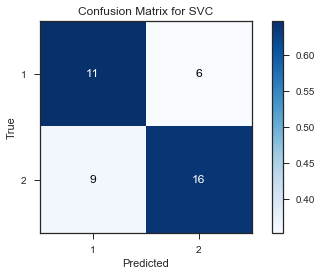

<Figure size 576x576 with 0 Axes>

In [36]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [37]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 18.270161 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.911 (+/- 0.072)
The IQR is 0.176 between [0.82,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90       770
         2.0       0.89      0.94      0.92       890

    accuracy                           0.91      1660
   macro avg       0.91      0.91      0.91      1660
weighted avg       0.91      0.91      0.91      1660

The average training time is 0.005027 seconds


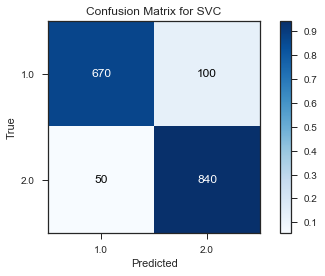

<Figure size 576x576 with 0 Axes>

In [38]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.8095
              precision    recall  f1-score   support

           1       0.75      0.83      0.79        18
           2       0.86      0.79      0.83        24

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



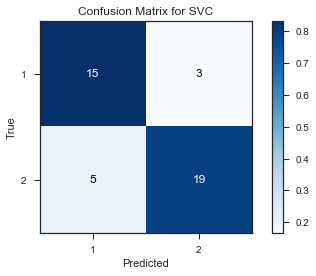

<Figure size 576x576 with 0 Axes>

In [39]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

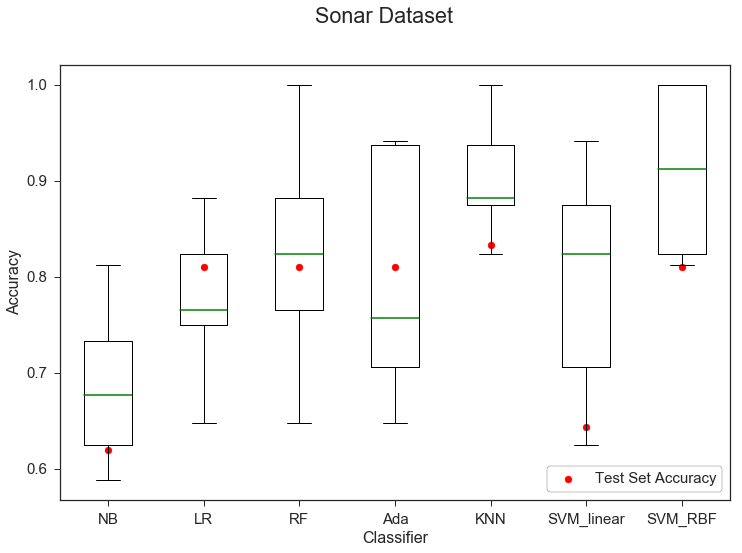

In [40]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Sonar Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black', loc = 'lower right')
# ax.set_ylim([0.5,1])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [41]:
test_results

[0.6190476190476191,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8333333333333334,
 0.6428571428571429,
 0.8095238095238095]

In [42]:
import pandas as pd
pd.DataFrame(test_results)

,0
0,0.619048
1,0.809524
2,0.809524
3,0.809524
4,0.833333
5,0.642857
6,0.809524


In [43]:
val_sonar=[val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]
%store val_sonar

Stored 'val_sonar' (list)
